In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('om_results.csv', low_memory = False)

<h3>Example data</h3>

In [4]:
df.head()

,car_type,category,colour,condition,doors_number,engine_code,engine_volume,fuel,horse_power,make,mileage,model,price,production_year,seats_number,seller,transimission,url,version,wd_type
0,Sedan/Limuzyna,Osobowe,Beżowy,Fine,4,NaN,1598.0,Benzyna,132.0,Toyota,52277.0,Corolla,59900,2015.0,5.0,Firma,Manualna,https://www.otomoto.pl/oferta/toyota-corolla-1...,NaN,NaN
1,Sedan/Limuzyna,Osobowe,Srebrny,Fine,4,NaN,1895.0,Benzyna,118.0,BMW,234750.0,Seria 3,10200,1999.0,5.0,Osoba prywatna,Manualna,https://www.otomoto.pl/oferta/bmw-seria-3-bmw-...,NaN,NaN
2,Kombi,Osobowe,Szary,Fine,NaN,NaN,1998.0,Diesel,126.0,Toyota,205300.0,Avensis,33300,2009.0,NaN,Osoba prywatna,Manualna,https://www.otomoto.pl/oferta/toyota-avensis-k...,NaN,NaN
3,SUV,Osobowe,Czarny,Fine,5,NaN,3999.0,Diesel,360.0,Mercedes-Benz,178700.0,ML,58000,2007.0,5.0,Osoba prywatna,Automatyczna,https://www.otomoto.pl/oferta/mercedes-benz-ml...,NaN,NaN
4,Hatchback,Osobowe,Szary,Fine,5,NaN,1400.0,Benzyna,150.0,Volkswagen,29000.0,Golf,55500,2013.0,5.0,Firma,Manualna,https://www.otomoto.pl/oferta/volkswagen-golf-...,NaN,NaN


In [5]:
df.tail()

,car_type,category,colour,condition,doors_number,engine_code,engine_volume,fuel,horse_power,make,mileage,model,price,production_year,seats_number,seller,transimission,url,version,wd_type
185527,Hatchback,Osobowe,Szary,Fine,5,NaN,1797.0,Benzyna,122.0,Toyota,8000.0,C-HR,120500,2016.0,5.0,Firma,Manualna,https://www.otomoto.pl/oferta/toyota-c-hr-1-8-...,NaN,NaN
185528,Sedan/Limuzyna,Osobowe,Inny kolor,Fine,4,NaN,1598.0,Benzyna,132.0,Toyota,7185.0,Corolla,81900,2016.0,5.0,Firma,Manualna,https://www.otomoto.pl/oferta/toyota-corolla-1...,NaN,NaN
185529,Kombi,Osobowe,Czarny,Fine,5,NaN,1998.0,Diesel,124.0,Toyota,75000.0,Avensis,56500,2013.0,5.0,Firma,Manualna,https://www.otomoto.pl/oferta/toyota-avensis-2...,NaN,NaN
185530,Hatchback,Osobowe,Niebieski,Fine,5,NaN,1600.0,Benzyna,105.0,Mazda,147000.0,3,21900,2009.0,5.0,Firma,Manualna,https://www.otomoto.pl/oferta/mazda-3-serwis-k...,NaN,NaN
185531,Hatchback,Osobowe,Czarny,Fine,5,NaN,2967.0,Diesel,272.0,Audi,16000.0,A7,238995.00000000003,2015.0,5.0,Firma,Automatyczna,https://www.otomoto.pl/oferta/audi-a7-mmi-plus...,NaN,NaN


<h3>Quantity of cars by car type.</h3>

In [9]:
df['car_type'].value_counts()

Hatchback         71707
Kombi             39881
Sedan/Limuzyna    29312
SUV               15631
Van (minibus)      8616
Minivan            7001
Sportowy/Coupe     5773
Terenowy           3835
Kabriolet          3033
Pick-up             570
vans                  1
others                1
Name: car_type, dtype: int64

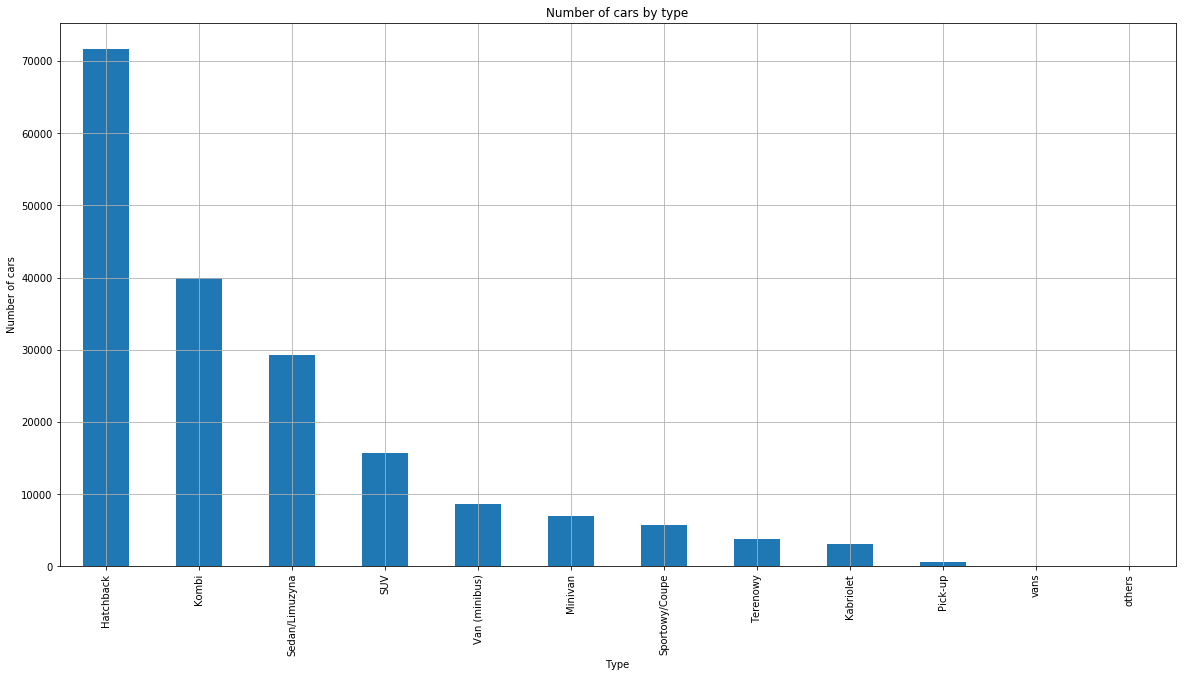

In [15]:
plt.figure(figsize=(20,10))
df['car_type'].value_counts().plot(kind = 'bar')
plt.grid()
plt.title('Number of cars by type')
plt.xlabel('Type')
plt.ylabel('Number of cars')
# plt.savefig('figures/cars_by_type.png')
plt.show()

<h3>Car category check - should be only 'osobowe' ('passenger cars' in polish).</h3>

In [10]:
df['category'].value_counts()

Osobowe    185532
Name: category, dtype: int64

<h3>Quantity of cars by color.</h3>

In [11]:
df['colour'].value_counts()

Czarny        43945
Srebrny       38443
Szary         22501
Niebieski     21848
Biały         16022
Inny kolor    14678
Czerwony       7127
Zielony        6391
Brązowy        3871
Bordowy        3502
Złoty          2957
Beżowy         2209
Fioletowy      1016
Żółty           854
Name: colour, dtype: int64

<h3>Quantity of cars by car condition. Car can be labeled as 'damaged', if it was not I added label 'fine'.</h3>

In [12]:
df['condition'].value_counts()

Fine       177559
Damaged      7973
Name: condition, dtype: int64

<h3>Quantity of cars by number of doors. There are some obvious mistakes visible (e.g. 33 990 is the car's price written in the field 'number of doors'</h3>

In [13]:
df['doors_number'].value_counts()

5         112119
4          25820
3          15512
2           5160
6            127
7             53
9              5
1              4
8              3
33 990         1
10             1
54             1
50             1
45             1
58             1
Name: doors_number, dtype: int64

<h3>Quantity of cars by the type of fuel used. </h3>
<p>Benzyna == gasoline</p>
<p>Hybryda == hybrid</p>
<p>Elektryczny == electric</p>
<p>Etanol == ethanol</p>

In [32]:
df['fuel'].value_counts()

Diesel         91388
Benzyna        82398
Benzyna+LPG    10437
Hybryda          910
Benzyna+CNG      115
Elektryczny      114
Etanol             2
Name: fuel, dtype: int64

<h3>Quantity of cars by make.</h3>

In [96]:
df['make'].value_counts()

Volkswagen       19930
Opel             17426
Audi             14180
BMW              13923
Ford             12883
Renault          11585
Mercedes-Benz     9933
Toyota            9591
Peugeot           8043
Citroën           7021
Škoda             6950
Fiat              5205
Seat              4921
Mazda             4501
Volvo             4437
Nissan            4321
Hyundai           4142
Honda             3826
Kia               3353
Suzuki            2386
Mitsubishi        2208
Chevrolet         1572
Alfa Romeo        1515
Mini              1023
Subaru             885
Jeep               874
Land Rover         860
Dacia              774
Chrysler           743
Jaguar             734
                 ...  
McLaren              8
Warszawa             8
Oldsmobile           7
Triumph              6
Nysa                 6
Chatenet             5
Tarpan               4
Zastava              4
Grecav               4
Austin               4
Gonow                3
Vauxhall             3
Mahindra   

<h3>Quantity of cars by number of seats.</h3>

In [47]:
df['seats_number'].value_counts()

5.0    134946
7.0      8332
4.0      8270
2.0      2581
9.0       840
6.0       679
3.0       415
8.0       411
1.0         7
Name: seats_number, dtype: int64

<h3>Quantity of cars by model.</h3>

In [48]:
len(df['model'].unique())

1076

In [12]:
df['model'].value_counts()

Astra          5717
Seria 3        5249
Golf           5163
Passat         5105
A4             4999
Focus          3848
Seria 5        3506
Octavia        3000
A6             2951
Corsa          2797
Mondeo         2698
Megane         2645
A3             2547
Polo           2304
Avensis        2155
Zafira         2149
Fabia          2073
Clio           1997
Yaris          1977
Klasa E        1960
Fiesta         1904
Scenic         1844
Vectra         1836
Laguna         1725
6              1704
Insignia       1658
Klasa C        1650
Leon           1643
Meriva         1522
Civic          1477
               ... 
Z4 M              1
Rendezvous        1
Stealth           1
Karoq             1
SSR               1
Bronco            1
21                1
Eight             1
Yukon             1
Belvedere         1
S1                1
Crossblade        1
224               1
Solstice          1
Starion           1
412               1
340               1
Mondial           1
Massif            1


<h3>Production year</h3>

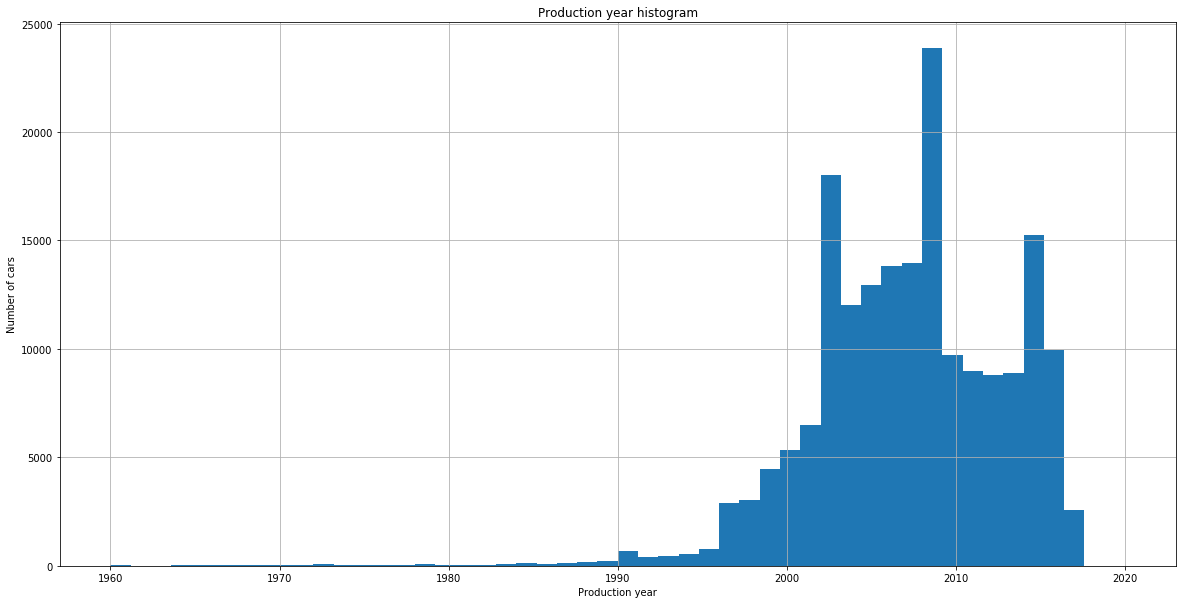

In [101]:
plt.figure(figsize=(20,10))
df['production_year'].hist(bins = 50, range = [1960, 2020])
plt.title('Production year histogram')
plt.xlabel('Production year')
plt.ylabel('Number of cars')
# plt.savefig('figures/production_year_histogram.png')
plt.show()

<h3>Horse power</h3>

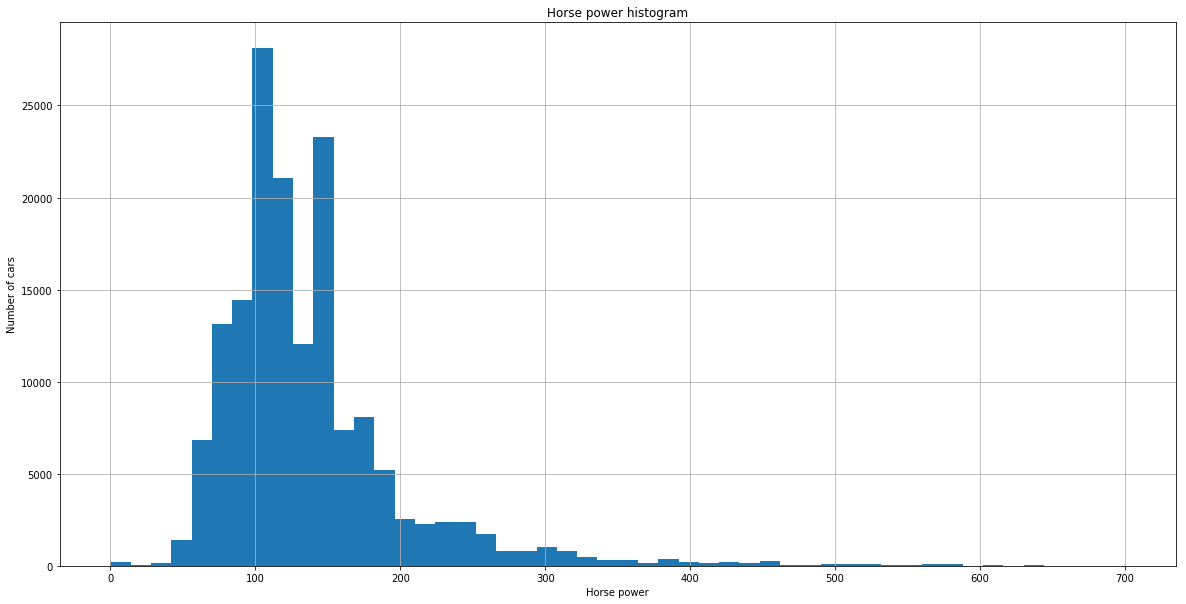

In [102]:
plt.figure(figsize=(20,10))
df['horse_power'].hist(range = [0, 700], bins = 50)
plt.title('Horse power histogram')
plt.xlabel('Horse power')
plt.ylabel('Number of cars')
# plt.savefig('figures/horse_power_histogram.png')
plt.show()

<h3>Quantity of cars by type of transmission (gearbox) </h3>
<p>Manualna == manual</p>
<p>Automatyczna == automatic</p>
<p>Półautomatyczna == semi-automatic</p>

In [87]:
df['transimission'].value_counts()

Manualna                            129531
Automatyczna                         36815
Półautomatyczna (ASG, Tiptronic)      1365
Name: transimission, dtype: int64

<h3>Quantity of cars by type of seller</h3>
<p>Osoba prywatna == private person</p>
<p>Firma == firm/car dealer</p>

In [88]:
df['seller'].value_counts()

Firma             105509
Osoba prywatna     80023
Name: seller, dtype: int64

<h3>Mileage<h3>

In [115]:
mean = df['mileage'].mean()
maximum = df['mileage'].max()
minimum = df['mileage'].min()
q1 = df['mileage'].quantile(0.25)
median = df['mileage'].median()
q3 = df['mileage'].quantile(0.75)
print('Mean: {}\nMinimum: {}\n25%: {}\n50%: {}\n75%: {}\nMaximum: {} '.format(mean, minimum, q1, median, q3, maximum))

Mean: 159122.2143134589
Minimum: 0.0
25%: 102250.0
50%: 165382.5
75%: 211000.0
Maximum: 9999999.0 


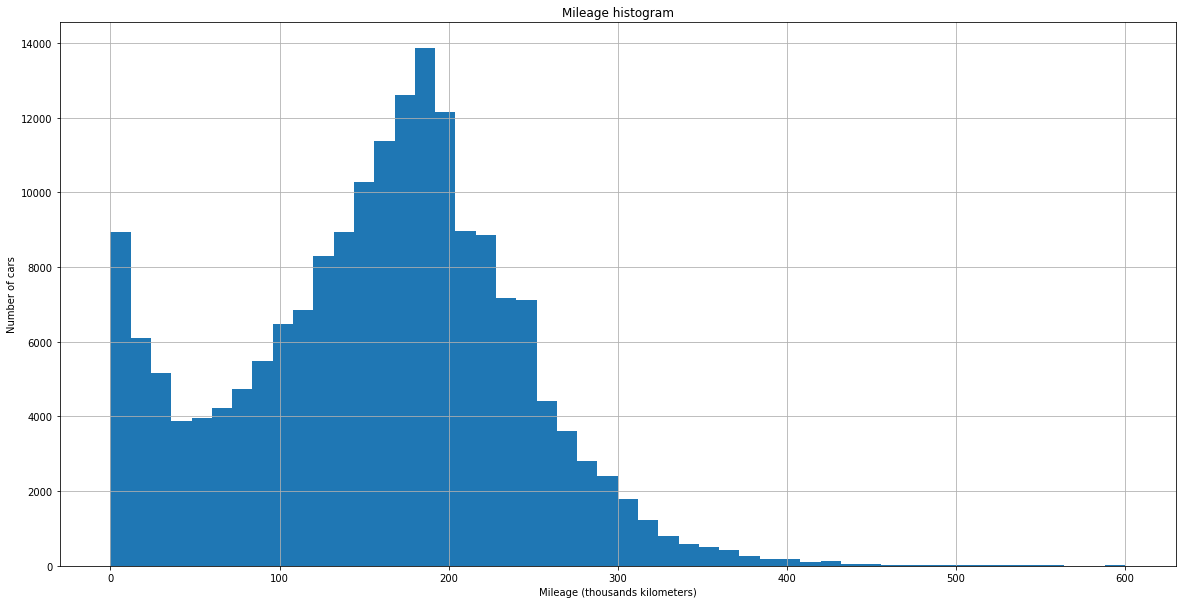

In [103]:
t_mileage = []
for x in df['mileage']:
    try:
        t_mileage.append(float(int(x)/1000))
    except ValueError:
        pass

plt.figure(figsize=(20,10))
plt.hist(t_mileage, bins = 50, range = [0, 600])
plt.title('Mileage histogram')
plt.xlabel('Mileage (thousands kilometers)')
plt.ylabel('Number of cars')
plt.grid()
# plt.savefig('figures/mileage_histogram.png')
plt.show()

<h3>Prices</h3>

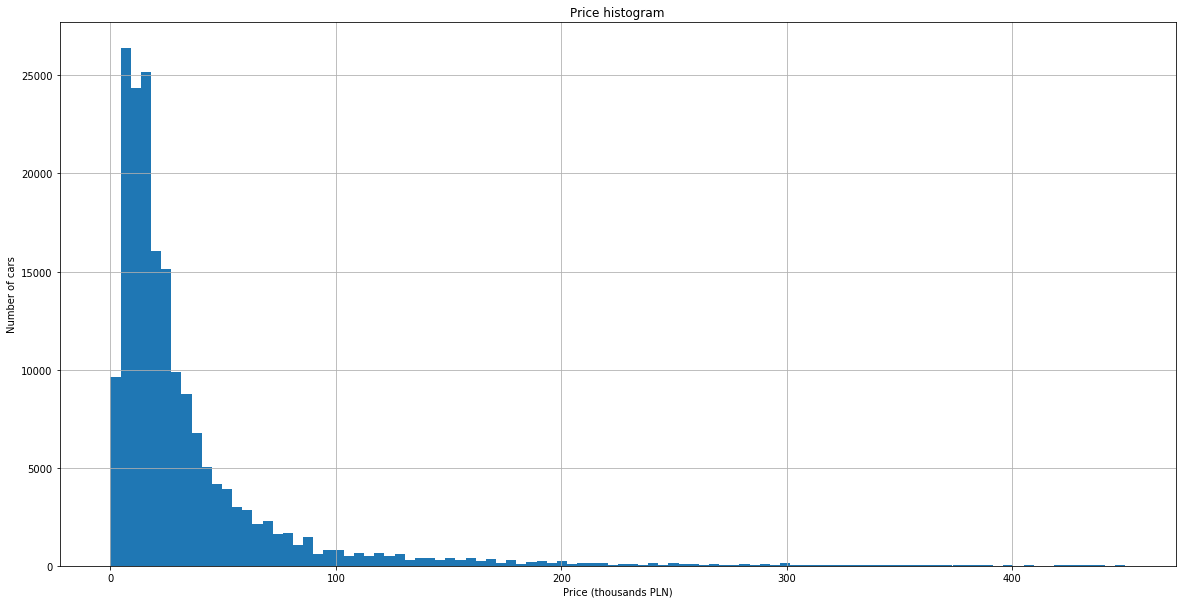

In [105]:
t_prices = []
for x in df['price']:
    try:
        t_prices.append(int(x)/1000)
    except ValueError:
        pass
    
plt.figure(figsize=(20,10))
plt.hist(t_prices, bins = 100, range = [0, 450])
plt.title('Price histogram')
plt.xlabel('Price (thousands PLN)')
plt.ylabel('Number of cars')
plt.grid()
# plt.savefig('figures/price_histogram.png')
plt.show()

<h3>Diesel engines mileage vs gasoline engines mileage</h3>

In [89]:
diesel_mileage = df['mileage'][df.fuel == 'Diesel']
gasoline_mileage = df['mileage'][df.fuel == 'Benzyna']
t_diesel_mileage = []
t_gasoline_mileage = []
for x in diesel_mileage:
    t_diesel_mileage.append(int(x)/1000)
    
for y in gasoline_mileage:    
    t_gasoline_mileage.append(int(y)/1000)

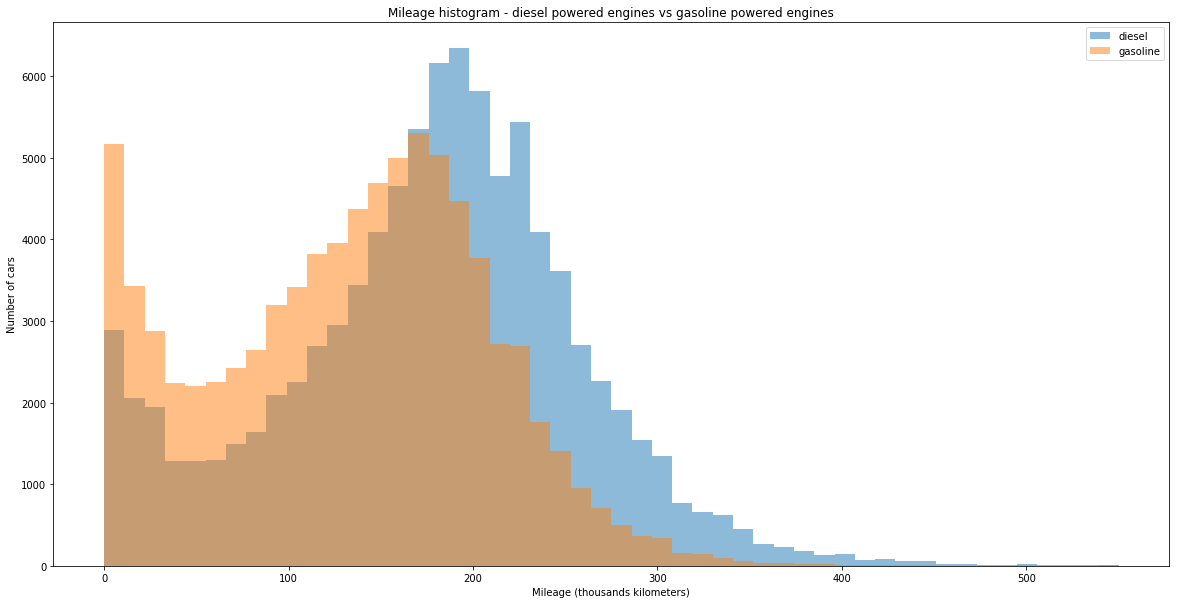

In [107]:
plt.figure(figsize=(20,10))
plt.hist(t_diesel_mileage, bins = 50, range = [0, 550], alpha = 0.5, label = 'diesel')
plt.hist(t_gasoline_mileage, bins = 50, range = [0, 550], alpha = 0.5, label = 'gasoline')
plt.title('Mileage histogram - diesel powered engines vs gasoline powered engines')
plt.xlabel('Mileage (thousands kilometers)')
plt.ylabel('Number of cars')
plt.legend(loc = 'best')
# plt.savefig('figures/mileage_dies_gas_histogram.png')
plt.show()